In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from utils_benchmark import (
    PlotData,
    plot_std
)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
current_working_directory = os.getcwd() + "/fidelity_data/recents"

In [3]:
# cases = [(3,2),(4,2),(4,3),(5,4),(5,3),(6,4),(6,5),(7,6)]
cases = [(4,2),(4,3),(5,3),(5,4),(6,4),(6,5),(7,6)]#,(8,6),(8,7)]
# cases = [(3,2),(4,2),(5,2),(6,2),(6,3),(7,2),(7,3),(7,4),(8,2),(8,3)]
# cases = [(3,2),(4,2),(5,2),(6,3)]
str_extra_mio = 'no'
d = 2


In [4]:
# mio_str = ''

# for N,k in cases:
#     fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,2.6))
#     dn = d**N
#     min_rank = dn - 6

#     model_df = pd.read_csv(f"{current_working_directory}/fidelity_data/N{N}k{k}v0_extra_mio_{str_extra_mio}", 
#                 usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0, how='all').astype(float)
#     model_df.columns = [rank for rank in range(min_rank,dn+1)]

#     rg_df = pd.read_csv(f"{current_working_directory}/fidelity_data/rgN{N}k{k}v0_extra_mio_{str_extra_mio}", 
#                 usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0, how='all').astype(float)
#     rg_df.columns = [rank for rank in range(min_rank,dn+1)]
    
#     if str_extra_mio == 'yes':
#          mio_str = '+MIO'
       
    
#     data_to_plot_model = PlotData(model_df,
#                                    f'model1{mio_str}',
#                                    '#5e17eb',
#                                    marker='s',
#                                    linestyle='--')
    
#     data_to_plot_rg = PlotData(rg_df,
#                                'random\nguessing',
#                                '#bf0000',
#                                marker='^',
#                                linestyle='-')

#     path = f'{current_working_directory}/plots/stdN{N}k{k}_extra_mio_{str_extra_mio}.png'
    
#     # if N == 3:
#     #     ylim_min = 0.5
#     #     ylim_max = 1.01
#     # else:
#     #     ylim_min = 0.98
#     #     ylim_max = 1.0009

#     ylim_min = 0.80
#     ylim_max = 1.01

#     plot_std(ax1,[data_to_plot_model,data_to_plot_rg], 
#                     ylims=[ylim_min,ylim_max],
#                     xlims=[dn-6-1e-2,dn + 1e-2], 
#                     pathplot='',
#                     legen_loc='lower right',
#                     xlabel='rank')
    
#     ax1.set_title(f'N{N}k{k}')
#     ax1.grid()
#     path = f"{current_working_directory}/fidelity_data/success_rate_N{N}k{k}v0_extra_mio_{str_extra_mio}"
#     success_rate = pd.read_csv(path).dropna(axis=1)
    
#     ax2.bar(success_rate['Unnamed: 0'], success_rate['model'], color='#5e17eb', label='model1')
#     ax2.set_xlabel('rank')
#     ax2.set_ylabel('success rate (%)')
#     ax2.set_ylim(0,100)
#     # ax2.grid()
#     ax2.set_title(f'N{N}k{k}')    
    

In [5]:
# for j in zip(np.indices((2,len(cases))).reshape(2,-1)):
#     print(j)

# rows_idxs, columns_idxs = np.indices((2,len(cases))).reshape(2,-1)[0], np.indices((2,len(cases))).reshape(2,-1)[1]

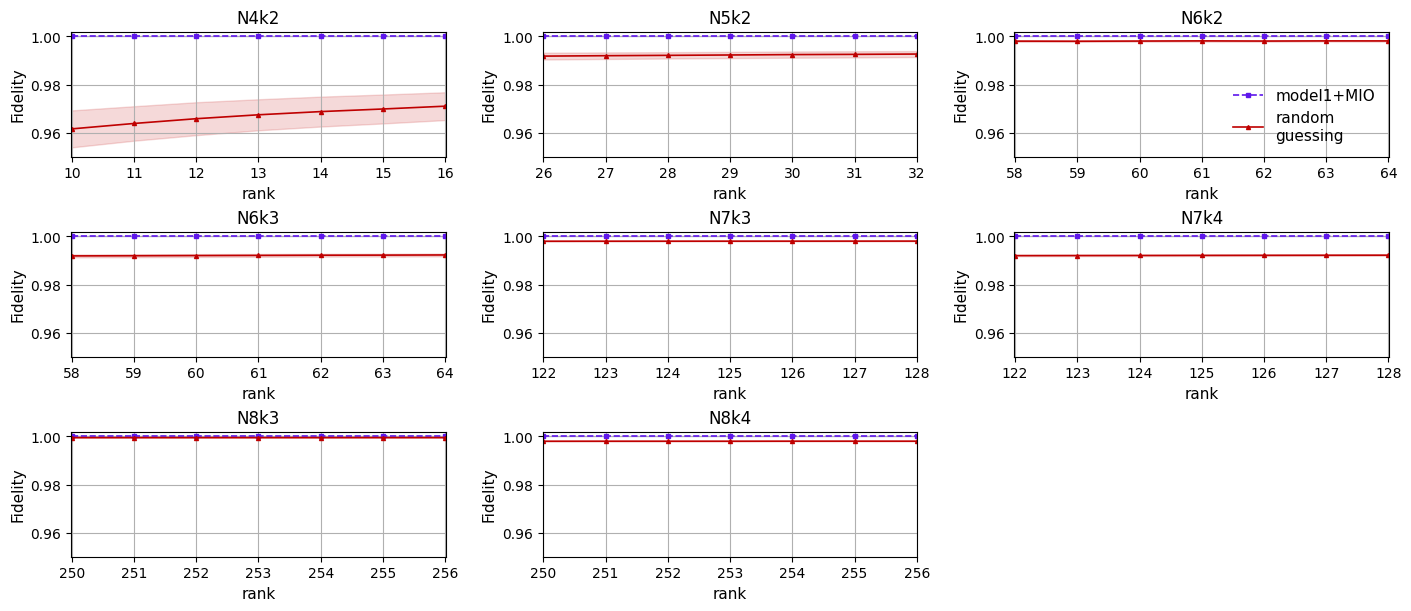

In [6]:
# cases = [(3,2),(4,2),(5,2),(6,2),(6,3),(7,2),(7,3),(7,4),(8,2),(8,3),(8,4)]

cases = [(4,2),(5,2),(6,2),(6,3),(7,3),(7,4),(8,3),(8,4)]
str_extra_mio = 'yes'
ncols = 3

# cases = [(3,2),(4,2),(5,2),(6,2),(6,3),(7,2),(7,3),(7,4),(8,3),(8,4)]
# cases = [(3,2),(4,2),(5,2),(6,2),(6,3),(7,2),(7,3),(7,4),(8,2),(8,3),(8,4)]
# str_extra_mio = 'yes'


# cases = [(4,2),(5,3),(6,4),(7,5),(8,6),(4,3),(5,4),(6,5),(7,6),(8,7)]
# cases = [(4,2),(4,3),(5,3),(5,4),(6,4),(6,5),(7,5),(7,6),(8,6),(8,7)]
# str_extra_mio = 'no'
# ncols = 3

nrows = int(np.ceil(len(cases)/ncols).item())
rows_idxs, columns_idxs = np.indices((nrows,ncols)).reshape(2,-1)[0], np.indices((nrows,ncols)).reshape(2,-1)[1]

fig, axs = plt.subplots(ncols=ncols, nrows=nrows,figsize=(14,6.), 
                        layout="constrained",gridspec_kw={'hspace': 0.0, 'wspace': 0.05})

axs = axs.flatten()

for j,(N,k) in enumerate(cases):

# for (i,j),(N,k) in zip(zip(rows_idxs, columns_idxs),cases):
    dn = d**N
    min_rank = dn - 6

    model_df = pd.read_csv(f"{current_working_directory}/N{N}k{k}v0_extra_mio_{str_extra_mio}", 
                usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0, how='all').astype(float)
    model_df.columns = [rank for rank in range(min_rank,dn+1)]

    rg_df = pd.read_csv(f"{current_working_directory}/rgN{N}k{k}v0_extra_mio_{str_extra_mio}", 
                usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0, how='all').astype(float)
    rg_df.columns = [rank for rank in range(min_rank,dn+1)]
    
    if str_extra_mio == 'yes':
         mio_str = '+MIO'
    else:
        mio_str = ''
       
    
    data_to_plot_model = PlotData(model_df,
                                   f'model1{mio_str}',
                                   '#5e17eb',
                                   marker='s',
                                   linestyle='--')
    
    data_to_plot_rg = PlotData(rg_df,
                               'random\nguessing',
                               '#bf0000',
                               marker='^',
                               linestyle='-')

    path = os.getcwd() + f'/plots/all_cases_extra_mio_{str_extra_mio}.png'
    
    if str_extra_mio == 'no':
        ylim_min = 0.80
        ylim_max = 1.01
    else:
        ylim_min = 0.95
        ylim_max = 1.002

    # axs[i,j].set_title(f'N{N}k{k}', fontsize=12) 
    axs[j].set_title(f'N{N}k{k}', fontsize=12) 
    plot_std(axs[j],[data_to_plot_model,data_to_plot_rg], 
                    ylims=[ylim_min,ylim_max],
                    xlims=[dn-6-1e-2,dn + 1e-2], 
                    pathplot='',
                    legen_loc='lower right',
                    xlabel='')
    # axs[i,j].set_xticks(np.arange(dn-6,dn+1,1))
    # xticks = [f'$2^N - {i}$' for i in range(6,-1,-1)]
    # xticks[-1] = f'$2^N$'
    # axs[i,j].set_xticks(np.arange(dn-6,dn+1,1), xticks)

axs[ncols-1].legend(loc='lower right', fontsize=11, frameon=False)

for ax in axs.flat:
    # ax.set(xlabel='rank', ylabel='Fidelity')
    ax.set_xlabel('rank', fontsize=11)
    ax.set_ylabel('Fidelity', fontsize=11)
    # ax.label_outer()
    ax.tick_params(axis='x', labelsize=10, rotation=0)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid()

fig.delaxes(axs[ncols*nrows-1])
# fig.delaxes(axs[ncols*nrows-2])

plt.savefig(path, bbox_inches='tight', transparent=True)
plt.show()


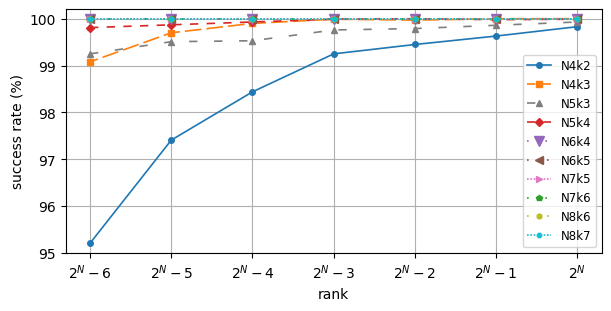

In [8]:
cases = [(4,2),(4,3),(5,3),(5,4),(6,4),(6,5),(7,5),(7,6),(8,6),(8,7)]
str_extra_mio = 'no'

linestyle_tuple = [
    ('solid',               '-'),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


linestyles = ['-','--','-.',':']
colors = ['tab:blue','tab:orange','tab:gray','tab:red','tab:purple','tab:brown',
          'tab:pink','tab:green','tab:olive','tab:cyan','b','m','r','g','c','y','k']
markers = ['o','s','^','D','v','<','>','p','h','8','*','+','x','|']
plt.subplots(figsize=(6,3), layout='constrained')


for l,(N,k) in enumerate(cases):
    dn = d**N
    min_rank = dn - 6

    # model_df = pd.read_csv(f"{current_working_directory}/fidelity_data/N{N}k{k}v0_extra_mio_{str_extra_mio}", 
    #             usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0, how='all').astype(float)
    # model_df.columns = [rank for rank in range(min_rank,dn+1)]

    path = f"{current_working_directory}/success_rate_N{N}k{k}v0_extra_mio_{str_extra_mio}"
    success_rate = pd.read_csv(path).dropna(axis=1)

    style  = linestyle_tuple[l][1]
    if l > 3:
        msize = 30/l
    else:
        msize = 4
    plt.plot(success_rate.index.to_numpy(), success_rate['model'].to_numpy(), 
             c=colors[l], linestyle = style, marker = markers[l], linewidth = 1.2, markersize=msize,label=f'N{N}k{k}')
    
plt.legend(frameon=True,loc='lower right',prop={'size': 8.5})
# xticks = [f'$2^N - {i}$' for i in range(7,-1,-1) if i!=0]
xticks = [f'$2^N - {i}$' for i in range(6,-1,-1)]
# xticks = sorted(xticks, reverse=True)
xticks[-1] = f'$2^N$'
plt.xticks([i for i in range(7)], xticks)
plt.xlabel('rank')
plt.ylabel('success rate (%)')
plt.ylim(95,100.2)
# plt.xlim(-0.09,6.1)
plt.grid()
path = os.getcwd() + f'/plots/success_rate_{str_extra_mio}.png'
plt.savefig(path, bbox_inches='tight', transparent=True)
plt.show()

In [341]:
# N = 8
# k = N-1
# str_extra_mio = 'yes'
# path = f"{current_working_directory}/fidelity_data/prop_neg_N{N}k{k}v0_extra_mio_{str_extra_mio}"
# prop_neg = pd.read_csv(path).dropna(axis=1)

# path = f"{current_working_directory}/fidelity_data/prop_neg_mio_N{N}k{k}v0_extra_mio_{str_extra_mio}"
# prop_neg_mio = pd.read_csv(path).dropna(axis=1)

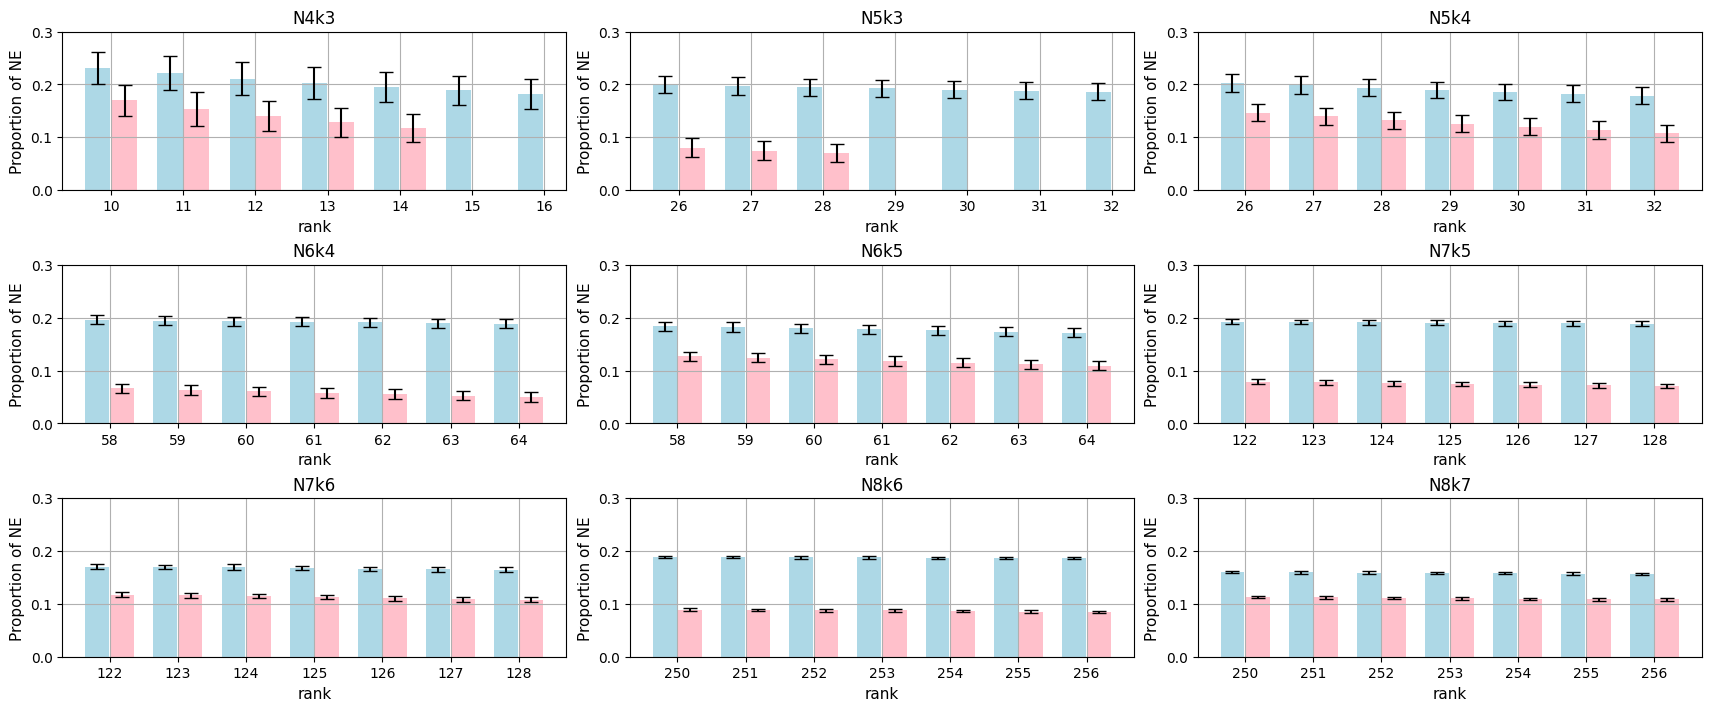

In [9]:
cases = [(4,3),(5,3),(5,4),(6,4),(6,5),(7,5),(7,6),(8,6),(8,7)]
str_extra_mio = 'yes'

ncols = 3

nrows = int(np.ceil(len(cases)/ncols).item())
rows_idxs, columns_idxs = np.indices((nrows,ncols)).reshape(2,-1)[0], np.indices((nrows,ncols)).reshape(2,-1)[1]

fig, axs = plt.subplots(ncols=ncols, nrows=nrows,figsize=(17,7),layout="constrained")

# for N,k in cases:
for (i,j),(N,k) in zip(zip(rows_idxs, columns_idxs),cases):
    path = f"{current_working_directory}/prop_neg_N{N}k{k}v0_extra_mio_{str_extra_mio}"
    prop_neg = pd.read_csv(path).dropna(axis=1)

    path = f"{current_working_directory}/prop_neg_mio_N{N}k{k}v0_extra_mio_{str_extra_mio}"
    prop_neg_mio = pd.read_csv(path).dropna(axis=1)

    # fig, ax = plt.subplots(figsize = (5,3), layout='constrained')
    mio = prop_neg_mio.describe().drop(columns=['Unnamed: 0']).loc['mean']
    mio_cdae_mio = prop_neg.describe().drop(columns=['Unnamed: 0']).loc['mean']

    mio_std = prop_neg_mio.describe().drop(columns=['Unnamed: 0']).loc['std']
    mio_cdae_mio_std = prop_neg.describe().drop(columns=['Unnamed: 0']).loc['std']

    x1 = mio.index.to_numpy().astype(int)
    x2 = mio_cdae_mio.index.to_numpy().astype(int)
    bar_width = 0.35
    offset = 0.185

    axs[i,j].bar(x1 - offset, mio, width=bar_width, yerr= mio_std, capsize=5,color='lightblue', label='MIO')
    axs[i,j].bar(x2 + offset, mio_cdae_mio, width=bar_width, yerr= mio_cdae_mio_std, capsize=5, color='pink', label='MIO-CDAE-MIO')
    axs[i,j].set_title(f'N{N}k{k}', fontsize=12)
    axs[i,j].set_ylim(0,0.3)
    # ax.bar(x1 - offset, mio, width=bar_width, color='#5e17eb', label='MIO')
    # ax.bar(x2 + offset, mio_cdae_mio, width=bar_width, color='#bf0000', label='MIO-CDAE-MIO')

    # try:
    #     for i in range(len(x1)):
    #         axs[i,j].text(x1[i] - offset, mio.iloc[i] + 0.01, np.round(mio.iloc[i],2), ha='center')
    #         # ax.text(x1[i] - offset, mio.iloc[i] + 0.01, np.round(mio.iloc[i],2), ha='center')
    # except:
    #     pass

    # try:
    #     for i in range(len(x1)):
    #         axs[i,j].text(x2[i] + offset, mio_cdae_mio.iloc[i] + 0.01, np.round(mio_cdae_mio.iloc[i],2),ha='center')
    #         # ax.text(x2[i] + offset, mio_cdae_mio.iloc[i] + 0.01, np.round(mio_cdae_mio.iloc[i],2),ha='center')
    # except:
    #     pass

    # axs[i,j].set_xticks(x1,x1)
    # ax[i,j].set_xticklabels(x1)
    # axs[i,j].grid()
# plt.xlabel('rank')
# plt.legend(loc='upper right')
# plt.title(f'N{N}k{k}')
# plt.ylim(0,1)   

for ax in axs.flat:
    # ax.set(xlabel='rank', ylabel='Fidelity')
    ax.set_xlabel('rank', fontsize=11)
    ax.set_ylabel('Proportion of NE', fontsize=11)
    # ax.label_outer()
    ax.tick_params(axis='x', labelsize=10, rotation=0)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid()

path = os.getcwd() + f'/plots/proportion_of_NE_{str_extra_mio}.png'
plt.savefig(path, bbox_inches='tight', transparent=True)
plt.show()


In [10]:
# cases = [(4,3),(5,3),(5,4),(6,4),(6,5),(7,5),(7,6),(8,2),(8,3),(8,4)]#,(8,4),(8,5),(8,6),(8,7)]
# for N,k in cases:
#     fig, ax = plt.subplots(figsize = (5,3), layout='constrained')
#     path = f"{current_working_directory}/fidelity_data/cum_neg_N{N}k{k}v0_extra_mio_{str_extra_mio}"
#     cum_neg = pd.read_csv(path).dropna(axis=1)

#     path = f"{current_working_directory}/fidelity_data/cum_neg_mio_N{N}k{k}v0_extra_mio_{str_extra_mio}"
#     cum_neg_mio = pd.read_csv(path).dropna(axis=1)

#     x1 = cum_neg.describe().drop(columns=['Unnamed: 0']).loc['mean'].abs() #.plot(color='#bf0000', label='MIO-CDAE-MIO')
#     x2 = cum_neg_mio.describe().drop(columns=['Unnamed: 0']).loc['mean'].abs() #.plot(color='#5e17eb', label='MIO')

#     std1 = cum_neg_mio.describe().drop(columns=['Unnamed: 0']).loc['std']
#     std2 = cum_neg_mio.describe().drop(columns=['Unnamed: 0']).loc['mean']

#     ax.plot(x1.index.to_numpy().astype(int), x1, marker = 'o', color='#bf0000', label='MIO-CDAE-MIO')
#     ax.plot(x2.index.to_numpy().astype(int), x2, marker = 's', color='#5e17eb', label='MIO')
    
#     plt.xlabel('rank')
#     plt.legend(loc='upper right')

In [199]:
linestyle_tuple = [
    ('solid',               '-'),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


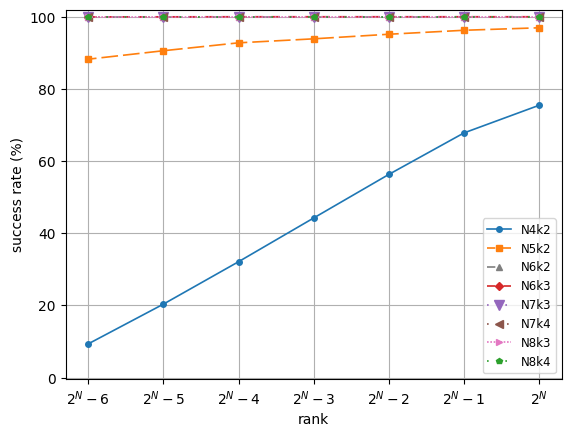

In [11]:

# cases = [(3,2),(4,2),(5,2),(6,2),(6,3),(7,2),(7,3),(7,4),(8,2),(8,3),(8,4)]
# cases = [(4,2),(5,3),(6,4),(7,5),(8,6),(4,3),(5,4),(6,5),(7,6),(8,7)]

# cases = [(4,2),(6,2),(7,3),(8,3),(5,2),(6,3),(7,4),(8,4)]
# cases = [(3,2),(4,2),(5,2),(6,2),(6,3),(7,2),(7,3),(7,4),(8,2),(8,3),(8,4)]
cases = [(4,2),(5,2),(6,2),(6,3),(7,3),(7,4),(8,3),(8,4)]
str_extra_mio = 'yes'

# cases = [(4,2),(4,3),(5,3),(5,4),(6,4),(6,5),(7,5),(7,6),(8,6),(8,7)]
# str_extra_mio = 'no'

linestyles = ['-','--','-.',':']
colors = ['tab:blue','tab:orange','tab:gray','tab:red','tab:purple','tab:brown',
          'tab:pink','tab:green','tab:olive','tab:cyan','b','m','r','g','c','y','k']
markers = ['o','s','^','D','v','<','>','p','h','8','*','+','x','|']
# plt.subplots(figsize=(6,3), layout='constrained')


for l,(N,k) in enumerate(cases):
    dn = d**N
    min_rank = dn - 6

    # model_df = pd.read_csv(f"{current_working_directory}/fidelity_data/N{N}k{k}v0_extra_mio_{str_extra_mio}", 
    #             usecols=[str(rank) for rank in range(min_rank,dn+1)]).dropna(axis=0, how='all').astype(float)
    # model_df.columns = [rank for rank in range(min_rank,dn+1)]

    path = f"{current_working_directory}/success_rate_N{N}k{k}v0_extra_mio_{str_extra_mio}"
    success_rate = pd.read_csv(path).dropna(axis=1)

    style  = linestyle_tuple[l][1]
    if l > 3:
        msize = 30/l
    else:
        msize = 4
    plt.plot(success_rate.index.to_numpy(), success_rate['model'].to_numpy(), 
             c=colors[l], linestyle = style, marker = markers[l], linewidth = 1.2, markersize=msize,label=f'N{N}k{k}')
    
plt.legend(frameon=True,loc='lower right',prop={'size': 8.5})
# xticks = [f'$2^N - {i}$' for i in range(7,-1,-1) if i!=0]
xticks = [f'$2^N - {i}$' for i in range(6,-1,-1)]
# xticks = sorted(xticks, reverse=True)
xticks[-1] = f'$2^N$'
plt.xticks([i for i in range(7)], xticks)
plt.xlabel('rank')
plt.ylabel('success rate (%)')
plt.ylim(-0.4,102)
# plt.xlim(-0.09,6.1)
plt.grid()
path = os.getcwd() + f'/plots/success_rate_{str_extra_mio}.png'
plt.savefig(path, bbox_inches='tight', transparent=True)
plt.show()

In [12]:
mem = pd.read_csv('memory_usage_N8k4.csv')

In [13]:
mem.iloc[0]

# Elapsed time   CPU (%)     Real (MB)   Virtual (MB)           0.000        0.000        0.875        ...
Name: 0, dtype: object